<a href="https://colab.research.google.com/github/SNEHA007-LAB/CustomerSegmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libaries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the customer data
customer_data = pd.read_csv('/content/Customers_Data.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

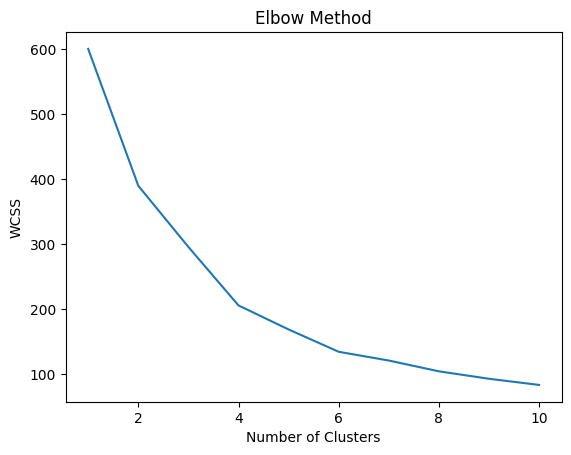

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [ ]:
# Clean and preprocess the data
X = customer_data[['Age', 'Annual_Income_(k$)', 'Spending_Score']].values
scaler = StandardScaler() #to resize distribution of values ​​
X_scaled = scaler.fit_transform(X) #scaled and centered-mean of 0 and a standard deviation of 1

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) #measuring the distance between each data point and its centroid
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering algorithm
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

#X
X_scaled

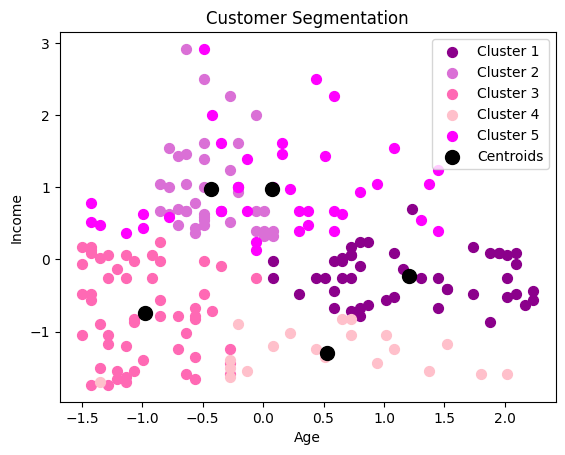

In [ ]:
# Visualize the results
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1]
            , s=50, c='darkmagenta', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1],
            s=50, c='orchid', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1],
            s=50, c='hotpink', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1],
            s=50, c='pink', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1],
            s=50, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='black', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [ ]:
customer_data['Segment'] = y_kmeans

In [ ]:
segment_1_message = "Hello Segment 1 customers, here's a special offer just for you!"
segment_2_message = "Welcome Segment 2 customers, check out our latest product!"
segment_3_message = "Attention Segment 3 customers, we have a limited time sale!"
segment_4_message = "Greetings Segment 4 customers, earn rewards for referrals!"
segment_5_message = "Hey Segment 5 customers, sign up for our loyalty program!"

In [ ]:
customer_data['Email'] = y_kmeans

In [ ]:
Email_1 = "Segment1Customer@gmail.com"
Email_2 = "Segment2Customer@gmail.com"
Email_3 = "Segment3Customer@gmail.com"
Email_4 = "Segment4Customer@gmail.com!"
Email_5 = "Segment5Customer@gmail.com"

In [ ]:
customer_data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Segment,Email
0,1,Male,19,15,39,2,2
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,3,3
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,2,2


In [ ]:
lp = int(input('Enter the segment: '))
for i in range(lp):
  segment_customers = customer_data[customer_data['Segment'].astype(str) == i]
if i == 0:
  message = segment_1_message
elif i == 1:
  message = segment_2_message
elif i == 2:
  message = segment_3_message
elif i == 3:
  message = segment_4_message
elif i == 4:
  message = segment_5_message
#print("Sending message",customer_data.Segment[i],"to Segment", i+1, "customers...")
#print("Sent message >>>>>",message)

Enter the segment: 1


In [ ]:
for i in range(lp):
  segment_email = customer_data[customer_data['Email']== i]
if i == 0:
  E = Email_1
elif i == 1:
  E = Email_2
elif i == 2:
  E = Email_3
elif i == 3:
  E = Email_4
elif i == 4:
  E = Email_5
#print("Sent message to cluster",i+1, "customers to Email ID",E)

In [ ]:
#print("Sending message",customer_data.Segment[i],"to Segment", i+1, "customers...")
i = int(input('Enter the segment: '))
print("Sent message >>>>>",message)
print("Sent message to cluster",i+1, "customers to Email ID",E)

Enter the segment: 1
Sent message >>>>> Hello Segment 1 customers, here's a special offer just for you!
Sent message to cluster 2 customers to Email ID Segment1Customer@gmail.com
